In [1]:
import numpy as np
import pandas as pd
import os
import re
import tensorflow as tf
from string import punctuation
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import seaborn as sns
import nltk
from wordcloud import WordCloud



from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,GRU,LSTM,RNN,SpatialDropout1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score



In [2]:
dir="D:/study/datasets/CSV_data/Fake-News-Classifier-master/data"


fake=pd.read_csv(f"{dir}/Fake.csv")

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64


<AxesSubplot:xlabel='subject', ylabel='count'>

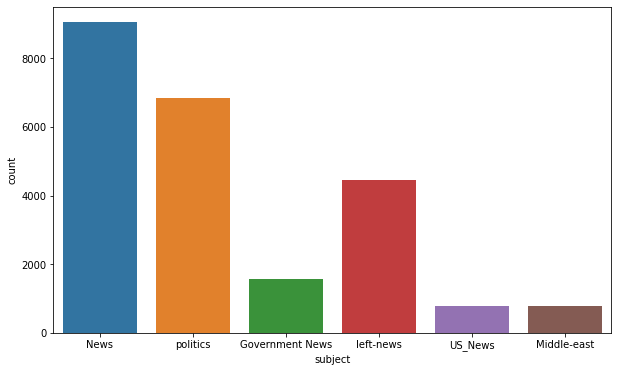

In [3]:
plt.figure(figsize=(10,6))
print(fake['subject'].value_counts())

sns.countplot('subject',data=fake)

In [4]:
text=''.join(fake['text'].tolist())

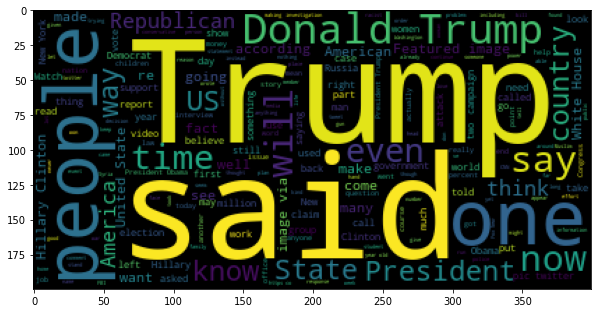

In [5]:
plt.figure(figsize=(10,6))
wordcloud=WordCloud().generate(text)
plt.imshow(wordcloud)

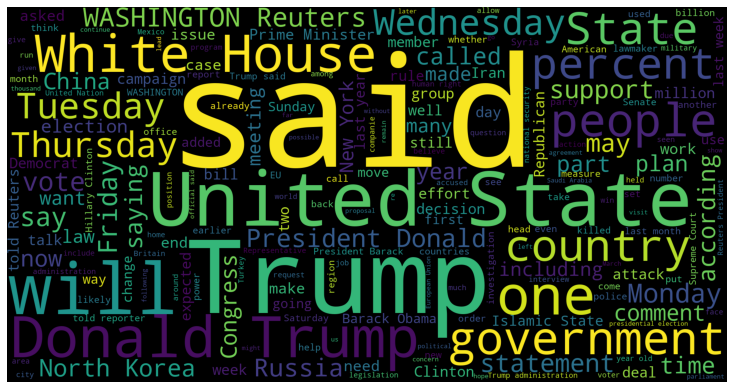

In [8]:
real=pd.read_csv(f"{dir}/True.csv")
text=''.join(real['text'].tolist())
plt.figure(figsize=(10,10))
wordcloud=WordCloud(width=1920,height=1000).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [11]:
real.text.values

array(['WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support

In [14]:
real=real.drop(8970,axis=0)

In [15]:
unknown_publishers=[]

for index,row in enumerate(real.text.values):
    try:
        record=row.split(' - ',maxsplit=1)

        assert (len(record[0])<100)
    except:
        # print(e)
        unknown_publishers.append(index)

In [10]:
unknown_publishers

[2922,
 3488,
 3782,
 4358,
 4465,
 5290,
 5379,
 5412,
 5504,
 5538,
 5588,
 5593,
 5784,
 6660,
 6823,
 7922,
 8194,
 8195,
 8247,
 8465,
 8481,
 8482,
 8505,
 8506,
 8771,
 9008,
 9009,
 9307,
 9618,
 9737,
 10479]

In [16]:
publisher=[]

tmp_text=[]


for index,row in enumerate(real.text.values):
    if index in unknown_publishers:
        tmp_text.append(row)
        publisher.append('Unknown')
    else:
        record=row.split(' - ',maxsplit=1)
        publisher.append(record[0])
        tmp_text.append(record[1])

In [19]:
empty_fake_index=[index for index,text in enumerate(fake.text.tolist()) if str(text).split()==""]

In [20]:
empty_fake_index

[]

In [26]:
# empty_fake_index=[text for index,text in enumerate(fake.text.tolist())]
# empty_fake_index

fake.text.isn().count_values()

SyntaxError: invalid syntax (<ipython-input-26-a77cccd496f2>, line 4)